# <font color='red'> CIA 3 </font>

### <font color='purple'> Name - Renuka Dutta </font>
### <font color='purple'> Reg no - 1928141 </font>

## <font color='yellow'> EDA on Universal Bank Data set </font>
### Contents
#### 1.Business understanding
#### 2.Data understanding
#### 3.Checking the numbers of rows and columns
#### 4.checking the data type
#### 5.check for the null and duplicate values
#### 6.Data pre-processing
#### 7.outlier detection
#### 8.using scatter plot and appropriate graphs to see the data distribution (Data Visualization)
#### 9.Preparing a heatmap for the data (Data Vusualization)
#### 10.Finding out correlation between the different variable
#### 11.Inserting images
#### 12.Building a statistical model (Basic)

### <font color='orange'>Business understanding<font>
#### <font color='turquoise'>The data is related to banking domain to be precise it belongs to the loan lending wing of the domain.Loan has always been a very heated up financial topic to be discussed all around the world. Every other day we get to hear about the frauds that take place with respect to loans and defaulters in this sections.The data provided here will help us to detect the patterns and trends that usually help us to detect the correct person who is eligible for the loan.</font>

In [6]:
# Importing required libraries.
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)


In [7]:
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [8]:
# for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### <font color='brown'> In this project we have used pandas,numpy,seaborn(visualisation),matplotlib(visualisation) and sklearn for statistical modelling (logistic regression) </font>

In [10]:
# Reading the data 

df = pd.read_csv("UniversalBank.csv")

In [12]:
# Checking the data type
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### <font color='brown'>All the variables are integer type only CCAvg is float in nature.</font>

In [13]:
# Total number of rows and columns
df.shape


(5000, 14)

#### <font color='light green'> there 5000 rows and 14 columns in the dataset.</font>

In [14]:
# Summarizing the data

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### <font color='orange'>Data description</font>
####  * Mean age of the customer applying for loan is 45 yrs and the mean is around 73 lakh dollars. also, the mean family members of the applicant is 2 or 3 with education level of mostly 1 for the applicant. The mean mortgage amount for the applicants goes to 56.49 lakh dollars depending upon the loan applied for.
####  * <font colour='pink'>The minimum age of the customer ion this data set is 23 and the maximum age is 67.</font>
####  * <font colour='pink'>The minimum work experience of the customer are 8 months and maximum is 43 months.</font>
####  * <font colour='pink'>The minimum income of the applicant is 8 and maximum is 224.</font>
####  * <font colour='pink'>The minimum family size in the data set is 1 and maximum is 4.</font>
####  * <font colour='pink'>The minimum education level is 1 and the maximum level is 3.</font>
####  * <font colour='pink'>The minimum mortgage by the customer are 0 and maximum is 635.</font>
####  * <font colour='pink'>the minimum credit card avg is 0 and maximum is 10.</font>
####  * <font colour='pink'>Personal loan,securities account, CD account are binary in nature.</font>

In [15]:
# To display the top 5 rows
df.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### checking the first five rows and columns

In [16]:
# To display the bottom 5 rows
df.tail(5) 


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### checking the last 5 rows and columns

In [17]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 14)


#### There are no duplicate rows present in the dataset.

In [18]:
# Used to count the number of rows before removing the data
df.count() 


ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [19]:
# Finding the null values.
print(df.isnull().sum())
# Dropping the missing values.
df = df.dropna() 
df.count()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

#### To cross check the null values we used the code dropping null value. After, using the code we can see that no columns or rows were dropped. Therefore, we can say that there was no null values 

In [20]:
# After dropping the values
print(df.isnull().sum()) 


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


#### There is no null values present

In [21]:
# Dropping irrelevant columns
df1 = df.drop(['ID', 'ZIP Code'], axis=1)
df1.head(5)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### Dropping of the invaluable variables

### <font color='purple'> The data used for this project is related to universal bank which is used for loan classification.The number of rows in this data set are 5000 and the columns are 14. By performing the further analysis we can see that there are <font color='green'>no null and duplicate values</font> in the data set.we have dropped the columns like Id and zip code which is not required for the analysis.Also, we have renamed few columns like <font color='blue'> CC Avg into credit card avg.</font></font>

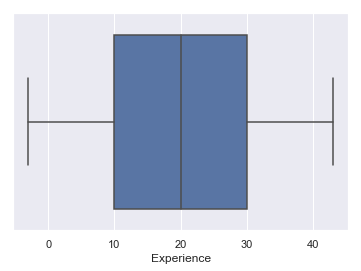

In [22]:
#looking at outliers
sns.boxplot(x=df['Experience'])


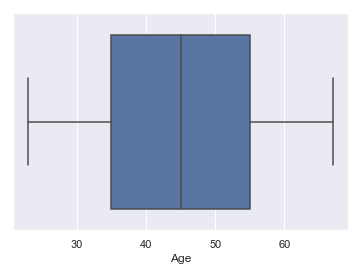

In [23]:
sns.boxplot(x=df['Age'])


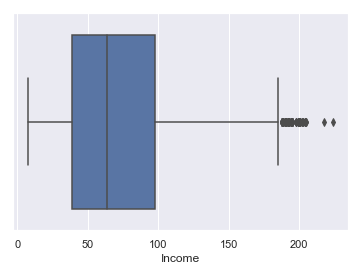

In [24]:
sns.boxplot(x=df['Income'])


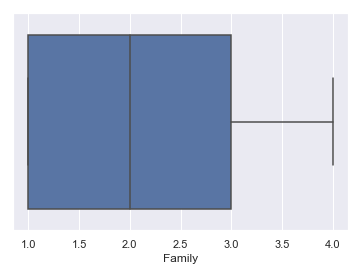

In [25]:
sns.boxplot(x=df['Family'])


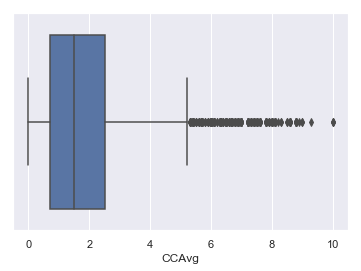

In [26]:
sns.boxplot(x=df['CCAvg'])


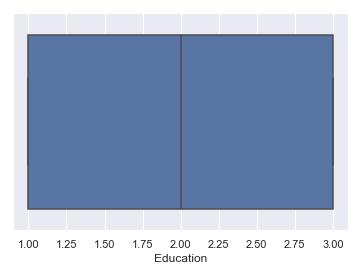

In [27]:
sns.boxplot(x=df['Education'])


### Insights from the boxplot:
#### <font color='dark pink'> while checking the outliers we could see that experice, age and data regarding the education has no outliers where as variables like credit card average, family and income have a lot of outliers in them and for this we have used the seaborn and matplotlib packages.</font>

In [29]:
# Renaming the column names
df1 = df.rename(columns={"CCAvg": "Credit Card Avg."})
df1.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,Credit Card Avg.,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### In the above codes are used to rename a particular variables.

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


ID                    2499.5
Age                     20.0
Experience              20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [31]:
df = df[~((df < (Q1- 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(3645, 14)

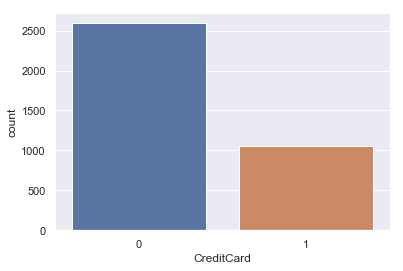

In [32]:
sns.countplot(data=df,x="CreditCard")


#### <font color='magenta pink' >using the above graph we could see the count of credit card holders and we can see that there are 1100 people having credit card and around 2700 people do not have one.</font>

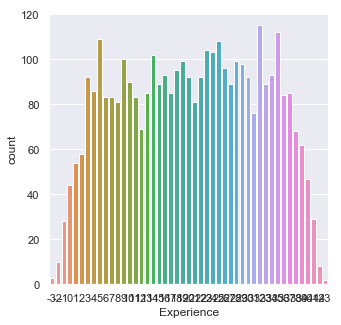

In [76]:
sns.countplot(data=df,x="Experience")



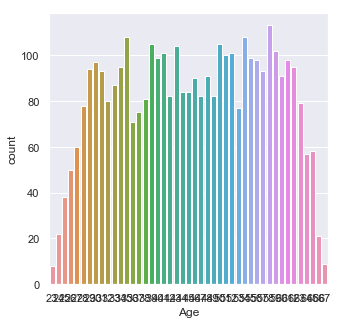

In [72]:

sns.countplot(data=df,x="Age")


#### *Both the graphs above (a) count of experiences tells that most of the poplulation is having a work experience of 15 yrs and 36 yrs
#### * (b) the age graph shows us that the minimum age of customers are 23 and and maximum they are of 67 yrs of age , though most of them are ranging between 55-60 yrs approximately.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,0.010304,0.012156,-0.001002,-0.006430,-0.018964,0.013845,0.020894,-0.011974,NaN,NaN,NaN,-0.010720,0.008467
Age,0.010304,1.000000,0.994048,-0.038458,-0.040376,-0.061385,-0.027979,0.036083,-0.013367,NaN,NaN,NaN,0.020064,0.007383
Experience,0.012156,0.994048,1.000000,-0.031719,-0.040397,-0.068280,-0.033336,0.007097,-0.012422,NaN,NaN,NaN,0.018798,0.008403
Income,-0.001002,-0.038458,-0.031719,1.000000,-0.042888,-0.167272,0.476446,-0.245254,-0.052715,NaN,NaN,NaN,0.009050,0.009809
ZIP Code,-0.006430,-0.040376,-0.040397,-0.042888,1.000000,0.023618,-0.027688,-0.006008,0.007550,NaN,NaN,NaN,0.037397,0.013136
Family,-0.018964,-0.061385,-0.068280,-0.167272,0.023618,1.000000,-0.066996,0.039488,0.024972,NaN,NaN,NaN,0.024214,0.011086
CCAvg,0.013845,-0.027979,-0.033336,0.476446,-0.027688,-0.066996,1.000000,-0.117809,-0.020246,NaN,NaN,NaN,-0.011457,-0.001340
Education,0.020894,0.036083,0.007097,-0.245254,-0.006008,0.039488,-0.117809,1.000000,0.007804,NaN,NaN,NaN,-0.014213,-0.021804
Mortgage,-0.011974,-0.013367,-0.012422,-0.052715,0.007550,0.024972,-0.020246,0.007804,1.000000,NaN,NaN,NaN,-0.031559,0.000717
Personal Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


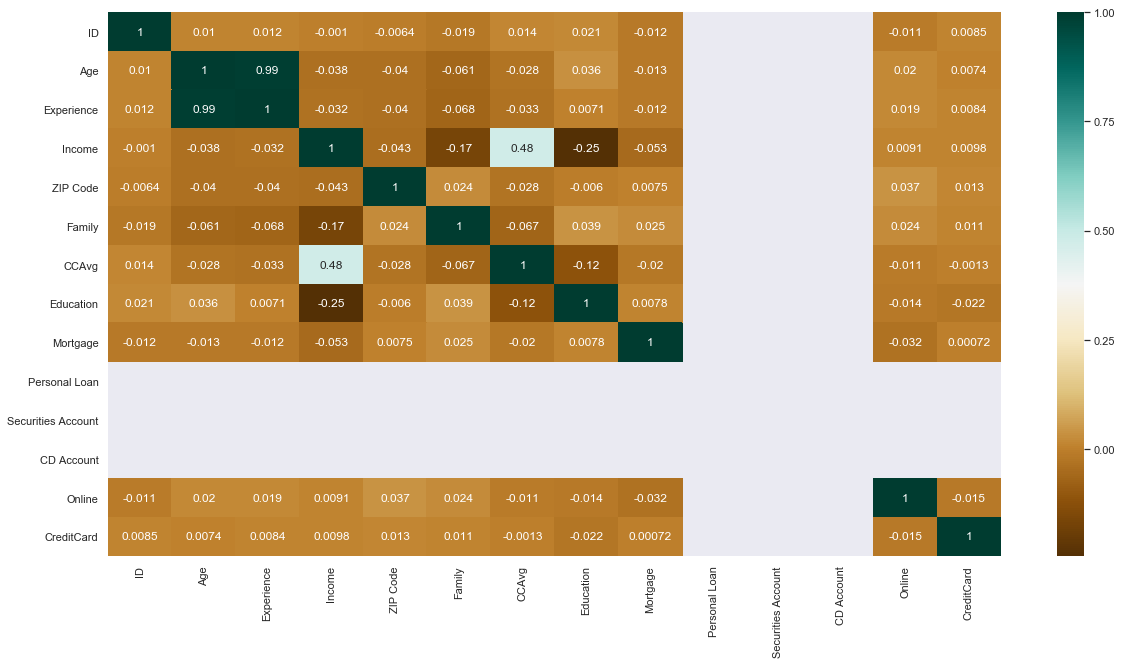

In [35]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


In [36]:
## Convert Categorical Columns to Dummies
cat_cols = ["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]
df2 = pd.get_dummies(df,columns=cat_cols,drop_first=True,)
df2.head(5)


,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Online_1,CreditCard_1
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,1,0,0,0
4,5,35,8,45,91330,1.0,0,0,0,1,1,0,0,1
5,6,37,13,29,92121,0.4,155,0,0,1,1,0,1,0
6,7,53,27,72,91711,1.5,0,1,0,0,1,0,1,0


,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Online_1,CreditCard_1
ID,1.000000,0.010304,0.012156,-0.001002,-0.006430,0.013845,-0.011974,0.019157,0.001953,-0.024299,-0.000945,0.019419,-0.010720,0.008467
Age,0.010304,1.000000,0.994048,-0.038458,-0.040376,-0.027979,-0.013367,0.019426,0.037460,-0.084045,-0.019958,0.042519,0.020064,0.007383
Experience,0.012156,0.994048,1.000000,-0.031719,-0.040397,-0.033336,-0.012422,0.023655,0.027756,-0.085532,-0.021453,0.016955,0.018798,0.008403
Income,-0.001002,-0.038458,-0.031719,1.000000,-0.042888,0.476446,-0.052715,0.095300,-0.087399,-0.125417,-0.151254,-0.148357,0.009050,0.009809
ZIP Code,-0.006430,-0.040376,-0.040397,-0.042888,1.000000,-0.027688,0.007550,-0.011723,0.008869,0.019294,0.038509,-0.024328,0.037397,0.013136
CCAvg,0.013845,-0.027979,-0.033336,0.476446,-0.027688,1.000000,-0.020246,0.009480,-0.061276,-0.024579,-0.068584,-0.073260,-0.011457,-0.001340
Mortgage,-0.011974,-0.013367,-0.012422,-0.052715,0.007550,-0.020246,1.000000,0.014797,-0.002136,0.018656,-0.006307,0.010172,-0.031559,0.000717
Family_2,0.019157,0.019426,0.023655,0.095300,-0.011723,0.009480,0.014797,1.000000,-0.287725,-0.329428,-0.102885,0.015827,-0.035852,0.026821
Family_3,0.001953,0.037460,0.027756,-0.087399,0.008869,-0.061276,-0.002136,-0.287725,1.000000,-0.299611,0.129978,-0.054977,0.010016,-0.018512
Family_4,-0.024299,-0.084045,-0.085532,-0.125417,0.019294,-0.024579,0.018656,-0.329428,-0.299611,1.000000,0.078542,-0.000818,0.026992,0.012554


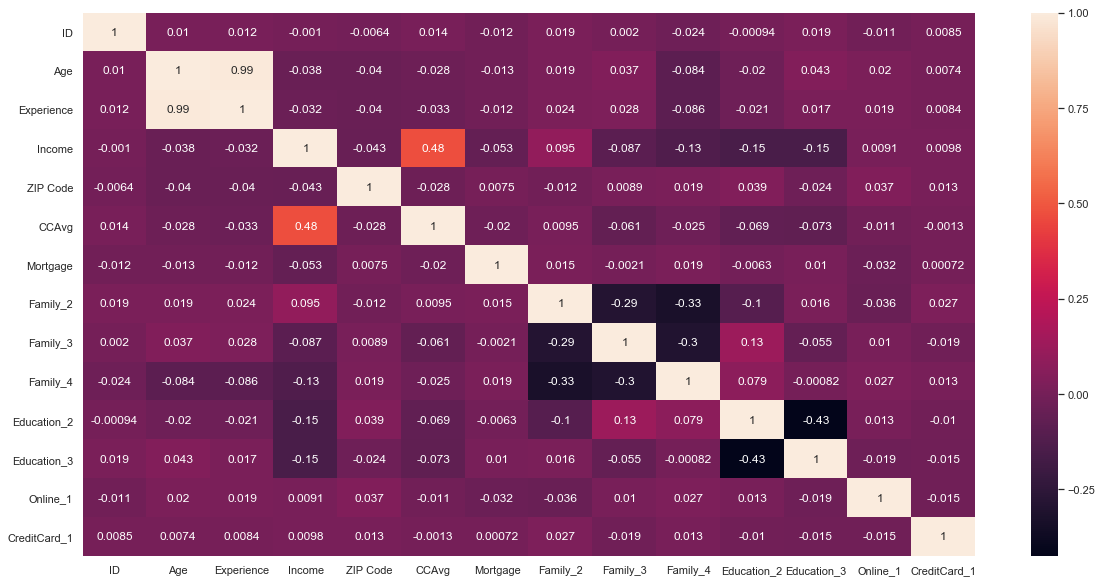

In [37]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df2.corr()
sns.heatmap(c,annot=True)
c


### <font color='green'> Here we have used heatmap to find out the correlation among various variables present in the dataset so we can see that age and experience have high correlation among them and they are positively correlated whereas correlation between income and credit card average is almost 50% and we can see that variables like credit card average and online transaction are negetively correlated. Also, we can notice that level of education and credit card average are negetively correlated.so, in this was with respect to the colour's brightness and darkness we can map the correlation.Though earlier we were not able to plot the whole heatmap due to some binary values but later chaning them into categorical values we could get the whole correlation.</font>

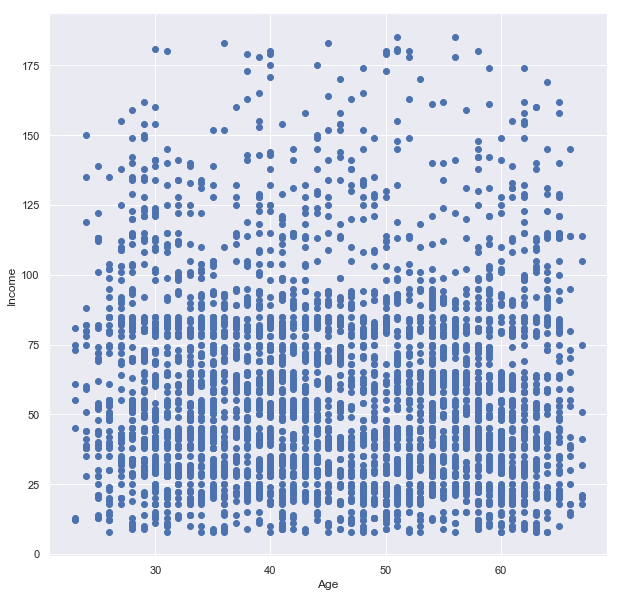

In [38]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df['Age'],df['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()


### The insight from the scatter plot might not be very useful for our analysis though we can see that there are outlier in the income of the people with respect to their ages.

In [78]:
#running logistic regression
x = df1
y = df1['Personal Loan']
df3 = df1.drop('Personal Loan', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


#### For statistical modelling we are using here logistic regression as this a problem of binary classification and here the dependent variable is - Personal loan and the data splitting has been done in the ratio of 80:20 ratio

In [51]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (4000, 14)
Shape of x_test : (1000, 14)
Shape of y_train : (4000,)
Shape of y_test : (1000,)


In [65]:
# Logistic Regression model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(x , y)
predicted_classes = model.predict(x)
accuracy = accuracy_score(y,predicted_classes)
parameters = model.coef_


#### <font color='purple'> Above are the codes for logistic regression.</font>

In [67]:
print("Accuracy :",accuracy)
print("parm:",parameters)
print("Model:",model)


Accuracy : 0.9076
parm: [[-5.65834686e-05  4.37250858e-04  3.55581572e-04  3.65771070e-02
  -6.45748676e-05  8.42707642e-04  1.28895412e-03  1.02422184e-03
   7.14145276e-04  1.40825491e-03  4.99961346e-05  3.46824925e-04
  -3.47982381e-06  9.65876114e-06]]
Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


#### The above codes helps us to get the accuracy at which the model is able to predict the wether a person is eligible for personal loan or not.
#### Therefore, we can say that accuracy of the model that we got is 90.76%, which means the model is able to predict the customers 90.76% accurately.

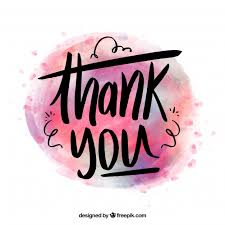

#### Inserting Image